# Assignment 4 (Geog 490)
## Maxim Altan-Lu Shapovalov
### Jan 31, 2023

## -------------------------------------------TASK 1 -------------------------------------------------------

In [1]:
# Import libraries & data
import numpy as np
import rasterio
import pandas as pd
import matplotlib.pyplot as plt

src01 = rasterio.open('data/nlcd_2001_phoenix.tif')
src19 = rasterio.open('data/nlcd_2019_phoenix.tif')

#### a) How many rows and columns are there in the nlcd_2001_phoenix.tif GeoTIFF?

In [2]:
print(f"Number of bands: {src01.count}") # just to be sure
print(f"Width (columns): {src01.width}")
print(f"Height (rows): {src01.height}")

Number of bands: 1
Width (columns): 8176
Height (rows): 5343


#### b) List the northernmost, southernmost, eastermost, and westernmost coordinates of the dataset.

In [3]:
src01.bounds

BoundingBox(left=-1589209.731401832, bottom=1171204.466635335, right=-1343923.498236316, top=1331490.51999102)

#### c) Plot the land cover data for 2001 using qualitative colormap of your choice.

In [4]:
# import data as a NumPy ndarray
nlcd_2001 = src01.read(1)
nlcd_2001

array([[52, 52, 52, ..., 42, 42, 42],
       [52, 52, 52, ..., 42, 42, 42],
       [52, 52, 52, ..., 42, 42, 42],
       ...,
       [52, 52, 52, ..., 52, 52, 52],
       [52, 52, 52, ..., 52, 52, 52],
       [52, 52, 52, ..., 52, 52, 52]], dtype=uint8)

Text(0.5, 1.0, 'Phoenix Land Cover – 2001')

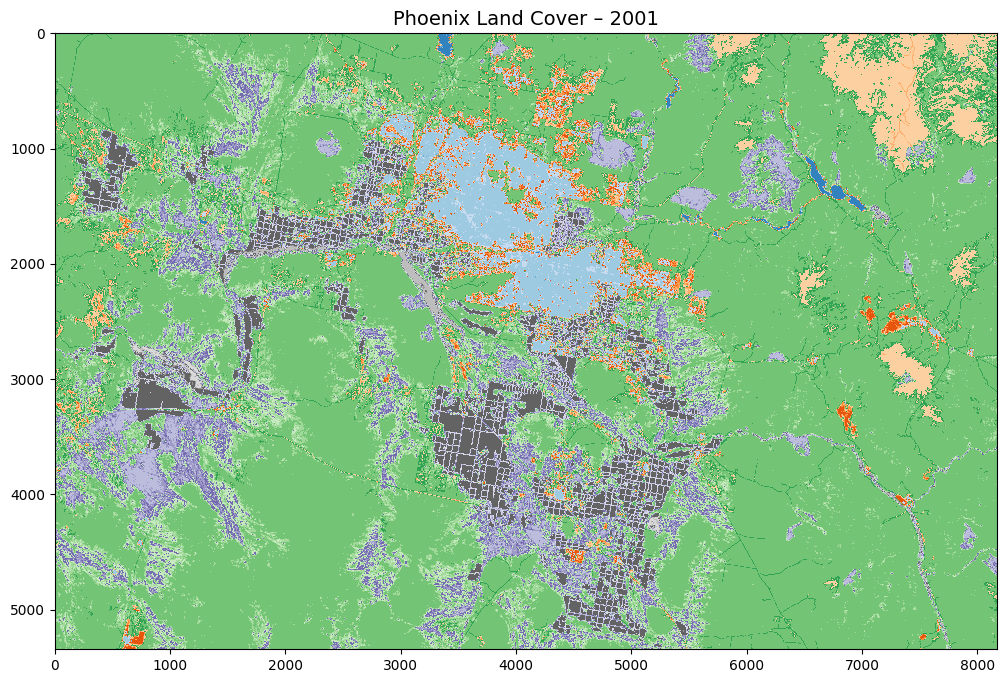

In [5]:
# plotting using matplotlib
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(nlcd_2001, cmap='tab20c')
ax.set_title("Phoenix Land Cover – 2001", fontsize=14)

#### d) Identify the land cover classes of three random grid cells. The following table is provided as a reference.

In [6]:
# use matrix indexing to find class value of specific pixels
a = nlcd_2001[1000, 3100]; print(a) # 82; x(column), y(row)
b = nlcd_2001[4000, 1600]; print(b) # 52
c = nlcd_2001[2000, 4800]; print(c) # 23
print(a,'is Cultivated Crops; ',b,'is Shrub/Scrub; ',c,'is Developed (medium intensity).')

82
52
23
82 is Cultivated Crops;  52 is Shrub/Scrub;  23 is Developed (medium intensity).


#### e) How many grid cells are classified as Developed, High Intensity, Cultivated Crops, and Open Water?

In [7]:
# use NumPy's "unique" function
unique, counts = np.unique(nlcd_2001, return_counts=True)
dict(zip(unique, counts))

{11: 143014,
 21: 919466,
 22: 809417,
 23: 953533,
 24: 322422,
 31: 706318,
 42: 1497913,
 43: 1603,
 52: 30851488,
 71: 4039637,
 81: 41732,
 82: 3046041,
 90: 289378,
 95: 62406}

In [8]:
# Count number of land pixels
land_pixels = nlcd_2001.size; land_pixels

43684368

In [9]:
# Convert to [pandas] DataFrame
df_2001 = pd.DataFrame(list(zip(unique, counts, (counts/land_pixels)*100)), 
                       columns=['lc', 'count_2001', 'fraction_2001'])

# open water is 11, Developed (high intensity) is 24, and Cultivated Crops is 82.
df_2001[df_2001['lc'].isin([11,24,82])]

,lc,count_2001,fraction_2001
0,11,143014,0.327380
4,24,322422,0.738072
11,82,3046041,6.972840


## -------------------------------------------TASK 2 -------------------------------------------------------

#### a) How many different land cover classes are there in the 2001 data?

In [13]:
ans = df_2001.shape[0]; print('There are',ans,'classes in the 2001 data')

There are 14 classes in the 2001 data


#### b) Aggregate all developed land cover classes (i.e. 21, 22, 23, and 24) into a single class. Bonus point if you can write it as a one-liner.

In [23]:
# Re-assign the 'developed' land cover class
nlcd_2001[nlcd_2001 == 22] = 21; nlcd_2001[nlcd_2001 == 23] = 21; nlcd_2001[nlcd_2001 == 24] = 21

In [28]:
# Check there are no more grid cells classified as 22,23,24
unique, counts = np.unique(nlcd_2001, return_counts=True)

# Convert to DataFrame
df_2001 = pd.DataFrame(list(zip(unique, counts, (counts/land_pixels)*100)), 
                       columns=['lc', 'count_2001', 'fraction_2001'])
df_2001

,lc,count_2001,fraction_2001
0,11,143014,0.327380
1,21,3004838,6.878520
2,31,706318,1.616867
3,42,1497913,3.428945
4,43,1603,0.003670
5,52,30851488,70.623634
6,71,4039637,9.247328
7,81,41732,0.095531
8,82,3046041,6.972840
9,90,289378,0.662429


#### c) What percentage of the 2001 data is occupied by this new developed class?

In [43]:
df_2001[df_2001['lc']==21]

,lc,count_2001,fraction_2001
1,21,3004838,6.87852


#### d) What percentage of the 2001 data is occupied by open water?

In [55]:
#open water is 11
ow = df_2001[df_2001['lc']==11]; ow['fraction_2001'].values

array([0.32738027])

#### e) Which is the most common land cover class in the 2001 data (as a percentage)?

In [61]:
idx = df_2001['count_2001'].argmax(); df_2001.iloc[idx]

lc               5.200000e+01
count_2001       3.085149e+07
fraction_2001    7.062363e+01
Name: 5, dtype: float64

## -------------------------------------------TASK 3 -------------------------------------------------------

#### a) Import the nlcd_2019_phoenix.tif GeoTIFF and aggregate all developed land cover classes (i.e. 21, 22, 23, and 24) into a single class.

In [66]:
# already imported data into src19 at top of this notebook
nlcd_2019 = src19.read(1)
nlcd_2019[nlcd_2019 == 22] = 21; nlcd_2019[nlcd_2019 == 23] = 21; nlcd_2019[nlcd_2019 == 24] = 21;

# Check there are no more grid cells classified as 22,23,24
unique, counts = np.unique(nlcd_2019, return_counts=True)

# Convert to DataFrame
df_2019 = pd.DataFrame(list(zip(unique, counts, (counts/land_pixels)*100)), 
                       columns=['lc', 'count_2019', 'fraction_2019']); df_2019

,lc,count_2019,fraction_2019
0,11,155179,0.355228
1,21,3913880,8.959452
2,31,685585,1.569406
3,41,8,0.000018
4,42,1245304,2.850686
5,43,1120,0.002564
6,52,30186997,69.102515
7,71,4284805,9.808554
8,81,37785,0.086495
9,82,2822333,6.460739


#### b) How much did the developed land cover class change by between 2001 and 2019 (as a percentage)?

In [78]:
# merge the dataset based on land cover class
df = pd.merge(df_2001, df_2019, on=['lc'])

# make new 'change' and 'change percent' columns
df['change'] = (df['count_2019'] - df['count_2001'])
df['change_percent'] = (((df['count_2019'] - df['count_2001']) / df['count_2001']) * 100); df

,lc,count_2001,fraction_2001,count_2019,fraction_2019,change,change_percent
0,11,143014,0.327380,155179,0.355228,12165,8.506160
1,21,3004838,6.878520,3913880,8.959452,909042,30.252613
2,31,706318,1.616867,685585,1.569406,-20733,-2.935363
3,42,1497913,3.428945,1245304,2.850686,-252609,-16.864064
4,43,1603,0.003670,1120,0.002564,-483,-30.131004
5,52,30851488,70.623634,30186997,69.102515,-664491,-2.153838
6,71,4039637,9.247328,4284805,9.808554,245168,6.069060
7,81,41732,0.095531,37785,0.086495,-3947,-9.457970
8,82,3046041,6.972840,2822333,6.460739,-223708,-7.344222
9,90,289378,0.662429,281933,0.645386,-7445,-2.572760


In [80]:
# show just change (as percentage) for "developed" class; dc means 'developed change'
dc = df[df['lc'] == 21]; dc['change_percent']

1    30.252613
Name: change_percent, dtype: float64

#### c) How much land was developed between 2001 and 2019 in km^2? Remember that each pixel is 30 x 30m.

In [89]:
# extract 'change' value; v is value
dc = df[df['lc'] == 21]; v = dc['change'].values; 

# convert pixels to m^2 and that to km^2
v1 = v * 30 * 30; ans = v1/1000000
print(ans,'km^2 were developed between 2001 and 2019')

[818.1378] km^2 were developed between 2001 and 2019


#### d) How did the cultivate crops class change between 2001 and 2019 (as a percentage and in km^2)?

In [91]:
# cultivated crops are class 82
dc = df[df['lc'] == 82]; v = dc['change'].values; 

# convert pixels to m^2 and that to km^2
v1 = v * 30 * 30; ans = v1/1000000
print('Cultivate Crops class changed by',ans,'km^2 between 2001 and 2019')

Cultivate Crops class changed by [-201.3372] km^2 between 2001 and 2019


#### e) Make a DataFrame showing land cover change (as percentage) for all classes.

In [104]:
# select just land cover class and change percent
df_change_perc = pd.DataFrame(list(zip(unique, (((df['count_2019'] - df['count_2001']) / df['count_2001']) * 100))), 
                       columns=['lc', 'change_percent'])
df_change_perc

,lc,change_percent
0,11,8.506160
1,21,30.252613
2,31,-2.935363
3,41,-16.864064
4,42,-30.131004
5,43,-2.153838
6,52,6.069060
7,71,-9.457970
8,81,-7.344222
9,82,-2.572760


## -------------------------------------------TASK 4 -------------------------------------------------------

In [35]:
# Import packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Read data
xds = xr.open_dataset('data/usa_climate_2021_v2.nc')

#### a) What are the dimensions of the dataset?

In [36]:
xds.dims

Frozen({'time': 365, 'latitude': 99, 'longitude': 232})

#### b) List the northernmost, southernmost, eastermost, and westernmost coordinates of the dataset.

In [37]:
n = xds['latitude'].values[0]
s = xds['latitude'].values[-1]
w = xds['longitude'].values[0]
e = xds['longitude'].values[-1]
print('northernmost:',n,' southernmost:',s,' eastermost:',e,' westernmost:',w,' coordinates')

northernmost: 49.24  southernmost: 24.74  eastermost: -67.03  westernmost: -124.78  coordinates


#### c) What was the mean air temperature (in F) and cloud cover (in %) of Eugene? 
(Hint: Right-click on Google Maps to record the approximate latitude and longitude of Eugene)

In [38]:
# Google said that coords of Eugene are 44.0521° N, 123.0868° W (44.0521,-123.0868)
t = xds['t2m'].sel(latitude=44.0521, longitude=-123.0868, method='nearest')
print('The mean annual air temperature in Eugene is %.2f F' %((t.mean('time').values - 273.15) * 9/5 + 32))

The mean annual air temperature in Eugene is 63.69 F


In [39]:
cc = xds['tcc'].sel(latitude=44.0521, longitude=-123.0868, method='nearest') # cloud cover
print('The mean annual cloud cover in Eugene is %.2f (out of 1)' %((cc.mean('time').values)))

The mean annual cloud cover in Eugene is 0.56 (out of 1)


#### d) What day was the hottest and coldest in Eugene?

In [40]:
# convert to pandas dataframe to get values for specific locations
eug = t.to_dataframe()

# must preserve the time dimension of data, so average over the latitude and longitude dimensions
#hot = t['t2m'].mean(['longitude','latitude'])
#d = hot['time'][hot.argmax()].values
#ts = pd.to_datetime(str(d)) # make sure to have pandas imported
#dd = ts.strftime('%m.%d.%Y')
#print('Hottest day in Eugene was',dd,'(mm.dd.yyyy)')

#cold = t['t2m'].mean(['longitude','latitude'])
#j = cold['time'][cold.argmin()].values; ts = pd.to_datetime(str(j)); jj = ts.strftime('%m.%d.%Y')
#print('Coldest day in Eugene was',jj,'(mm.dd.yyyy)')

xh = eug['t2m'].argmax(); eug.iloc[xh]
xc = eug['t2m'].argmin(); eug.iloc[xc]
print('Hottest day: 2021-06-08. Coldest day: 2021-12-28')

Hottest day: 2021-06-08. Coldest day: 2021-12-28


In [41]:
# alt (hot)
tmax = eug['t2m'].max(); eug[eug['t2m']==tmax]

,longitude,latitude,t2m
time,,,
2021-06-28,-123.029999,43.990002,316.26239


In [42]:
# alt (cold)
tmin = eug['t2m'].min(); eug[eug['t2m']==tmin]

,longitude,latitude,t2m
time,,,
2021-12-28,-123.029999,43.990002,272.902191


#### e) What day was the hottest and coldest in Florence, OR?

In [44]:
# Florence coords 43.9826° N, 124.0998° W (43.9826,-124.0998)
f = xds['t2m'].sel(latitude=43.9826, longitude=-124.0998, method='nearest')
flo = f.to_dataframe()
fmax = flo['t2m'].max(); flo[flo['t2m']==fmax]

,longitude,latitude,t2m
time,,,
2021-06-28,-124.029999,43.990002,301.330017


In [45]:
fmin = flo['t2m'].min(); flo[flo['t2m']==fmin]

,longitude,latitude,t2m
time,,,
2021-12-28,-124.029999,43.990002,275.087463


## -------------------------------------------TASK 5 -------------------------------------------------------

##### Find the following grid cells in the US climate data and provide the lat/lons and a rough location of where they are located.

#### a) Highest annual mean air temperature (i.e. hottest place)

In [72]:
# Compute mean air temperature for entire period
temp = xds['t2m'] # isolate/save just 2 m temp
mean_temp = temp.mean(['time']) # calculate mean

# find grid cell with highest temperature
max_value = mean_temp.argmax()
# convert 1d to 2d
high_idx = np.unravel_index(max_value, mean_temp.shape) # print(high_idx)

# find the hottest place!!
hot = mean_temp[high_idx[0], high_idx[1]].values
print('Hottest place in USA is %.2f F' % ((hot - 273.15) * 9/5 + 32))

Hottest place in USA is 90.24 F


In [73]:
bb = mean_temp[high_idx[0], high_idx[1]]
bb.coords # longitude -115.5, latitude 32.99
print('Brawley, CA!')

Brawley, CA!


#### b) Lowest annual mean air temperature (i.e. coldest place)

In [74]:
# find grid cell with lowest temperature
min_value = mean_temp.argmin()
# convert 1d to 2d
low_idx = np.unravel_index(min_value, mean_temp.shape) # print(low_idx)

# find the coldest place!!
cold = mean_temp[low_idx[0], low_idx[1]].values
print('Coldest place in USA is %.2f F' % ((cold - 273.15) * 9/5 + 32))

Coldest place in USA is 35.96 F


In [76]:
# ubicación
bb = mean_temp[low_idx[0], low_idx[1]]
bb.coords # longitude -109.8, latitude 43.99
print('Near Torofare Mountain in Shoshone National Forest, Wyoming!')

Near Torofare Mountain in Shoshone National Forest, Wyoming!


#### c) Highest annual mean cloudiness (i.e. cloudiest place)

In [80]:
# Compute mean cloud cover for entire period
cloud = xds['tcc'] # isolate/save just total cloud cover
mean_cloud = cloud.mean(['time']) # calculate mean

# find grid cell with highest cloudiness
max_value = mean_cloud.argmax()
# convert 1d to 2d
high_idx = np.unravel_index(max_value, mean_cloud.shape) 

# find the cloudiest place!!
oblako = mean_cloud[high_idx[0], high_idx[1]].values
print('Cloudiest place in USA is',oblako,'(out of 1)')

Cloudiest place in USA is 0.7364921457963447 (out of 1)


In [82]:
# ubicación
bb = mean_cloud[high_idx[0], high_idx[1]]
bb.coords # longitude -123.5, latitude 25.74
print('North Pacific Ocean)')

North Pacific Ocean)


#### d) Lowest annual mean cloudiest (i.e. least cloudy place)

In [83]:
# find grid cell with lowest cloudiness
min_value = mean_cloud.argmin()
# convert 1d to 2d
low_idx = np.unravel_index(min_value, mean_cloud.shape)
# find the cloudiest place!!
pusto = mean_cloud[low_idx[0], low_idx[1]].values
print('Least cloudy place in USA is',pusto,'(out of 1)')

Least cloudy place in USA is 0.20022885146206373 (out of 1)


In [85]:
# ubicación
bb = mean_cloud[low_idx[0], low_idx[1]]
bb.coords # longitude -114.3, latitude 30.74
print('Gulf of California next to Baja California, Mexico')

Gulf of California next to Baja California, Mexico


#### e) Highest range in air temperature

In [101]:
temp = xds['t2m'] # isolate/save just 2 m temp
max_temp = temp.max(['time']) # calculate mean
min_temp = temp.min(['time']) # calculate mean
diff = max_temp - min_temp

# find grid cell with biggest temperature range
max_value = diff.argmax()
# convert 1d to 2d
high_idx = np.unravel_index(max_value, max_temp.shape) # print(high_idx)

# find the place!!
bb = max_temp[high_idx[0], high_idx[1]]
bb.coords # longitude -107.0, latitude 47.99
print('near North Fork Lone Tree Creek in Montana')

near North Fork Lone Tree Creek in Montana
